In [1]:
from matplotlib.font_manager import fontManager
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.set(font='Malgun Gothic',
       rc ={'axes.unicode_minus':False},
       style='whitegrid')

In [2]:
data = pd.read_csv("../../data/train/data.csv")

In [3]:
train = data.loc[lambda x:x.취급액.isnull() == False]
test = data.loc[lambda x:x.취급액.isnull() == True]

In [ ]:
train

In [32]:
train.shape, test.shape

((35379, 98), (2716, 98))

In [4]:
import time 

import matplotlib 
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


In [34]:
X = train[["판매단가","취급액"]]
model1 = IsolationForest(contamination = 0.1)
yhat = model1.fit_predict(X)

In [37]:
train = train.assign(yhat= yhat)

In [38]:
trimmed_train = train.loc[lambda x:x.yhat != -1]

In [39]:
trimmed_train.shape

(31842, 99)

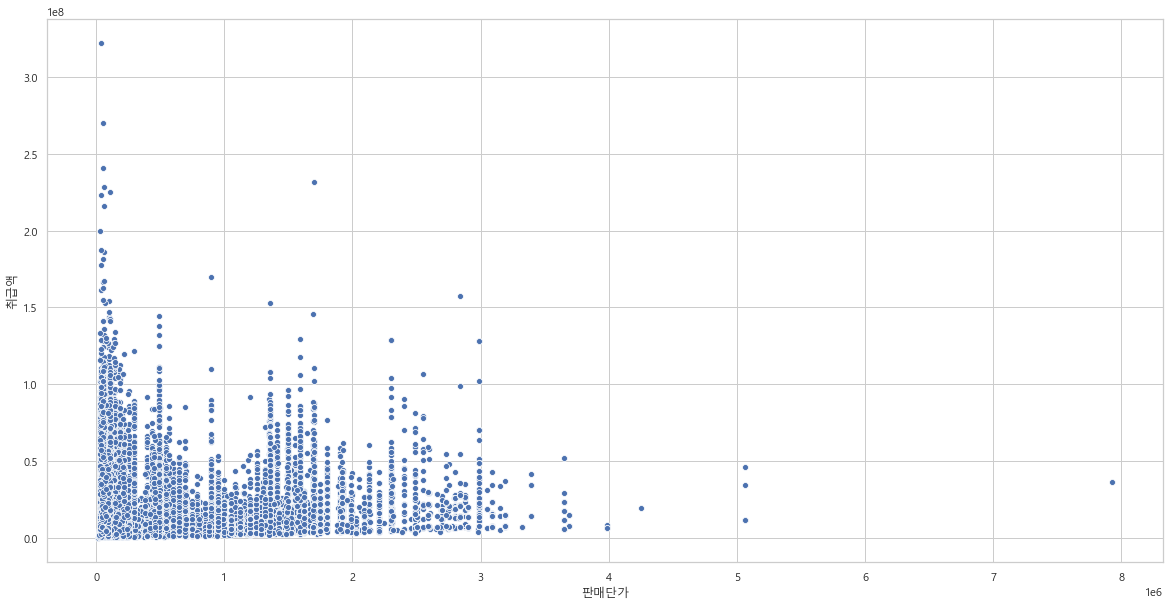

In [41]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='판매단가',y="취급액", data= data)

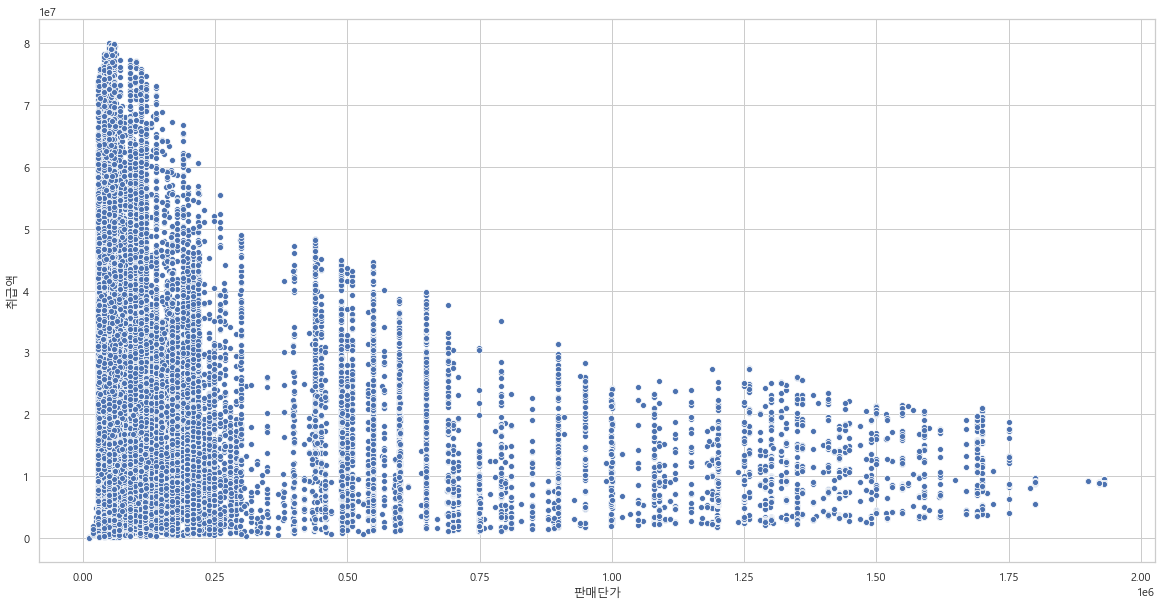

In [40]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="판매단가", y="취급액", data=trimmed_train)

In [42]:
trimmed_data = pd.concat([trimmed_train, test], axis=0)

In [45]:
trimmed_data.drop(columns=["yhat"], inplace=True)

In [47]:
trimmed_data.to_csv("../../data/train/trimmed_data.csv", index=False)